# Gathering 

Data will gather from 3 sources:

   - Download Twitter archive Manually in twitter_archive_enhanced.csv file
   - Tweet image predictions by using URL
     'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
      Then saving on image_predictions.tsv file
   - Each tweet's retweet count and favorite ("like") count at minimum, and any additional data Using tweepy 
      Package for python and save it on tweet_json.txt


In [82]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy 
import json

In [83]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [84]:
#Download the image predictions file programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [85]:
#Set up tweet API 
consumer_key = 'jqSdAMopA1pKWrqItbSyHn6jG'
consumer_secret = 'IkpShUBp2iSf6VzarhiEB5sD1qXI7Qh0heVdmDrd6Ll9VIUMCf'
access_token = '224699529-15Y9N0bDNTsMmT3xSDQao6M7wIpmdY28Jrv5PaOY'
access_secret = 'NqL90U93Ohl8dCvAbhbCWO9h9BdXsUZCS09lEC7emYopR'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [86]:
# Use Twitter API to collect status data 
tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended',wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
Rate limit reached. Sleeping for: 741
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 739


In [87]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [88]:
# Load the Twitter API data
tweet_api = pd.read_json('tweet_json.txt')
tweet_api['tweet_id'] = tweet_id_success
tweet_api = tweet_api[['tweet_id', 'favorite_count', 'retweet_count']]

tweet_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35292,7444
1,892177421306343426,30532,5532
2,891815181378084864,22964,3655
3,891689557279858688,38575,7619
4,891327558926688256,36850,8205


# 2. Assessing 

The assessing data had Two types of issues Quality and Tidiness

In [89]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [90]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [91]:
sum (twitter_archive['tweet_id'].duplicated())

0

In [92]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Buddy           7
an              7
Bailey          7
Toby            7
Dave            6
Rusty           6
Milo            6
Koda            6
Oscar           6
Jax             6
Jack            6
Stanley         6
Bella           6
Leo             6
Scout           6
Sunny           5
             ... 
Bobb            1
Bayley          1
Traviss         1
Marlee          1
Fletcher        1
Bloo            1
Milky           1
Brudge          1
Longfellow      1
Boots           1
Remy            1
Chase           1
Jaycob          1
Asher           1
Maxwell         1
Gilbert         1
Henry           1
Enchilada       1
Bert            1
Cal             1
Jeremy          1
Anthony         1
Pherb           1
Stark           1
Hamrick   

In [93]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [94]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [95]:
sum(image_prediction['tweet_id'].duplicated())

0

In [96]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
miniature_pinscher                 20
Samoyed                            20
chow                               20
malinois                           20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [97]:
tweet_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35292,7444
1,892177421306343426,30532,5532
2,891815181378084864,22964,3655
3,891689557279858688,38575,7619
4,891327558926688256,36850,8205


In [98]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [99]:
sum(tweet_api['tweet_id'].duplicated())

0

In [100]:
tweet_api['favorite_count']

0       35292
1       30532
2       22964
3       38575
4       36850
5       18582
6       10802
7       59459
8       25569
9       29175
10      28127
11      25598
12      43929
13      24688
14      13913
15      23065
16      26664
17      23412
18      18061
19      19953
20      27735
21      42483
22      62850
23      30849
24      28092
25      31850
26      10944
27      20615
28      19345
29        110
        ...  
2301      396
2302       98
2303      154
2304      169
2305      698
2306      194
2307      268
2308      179
2309      450
2310      131
2311      157
2312       94
2313    13267
2314       69
2315      140
2316      153
2317      100
2318      284
2319      133
2320      437
2321      103
2322      263
2323      402
2324     1094
2325      119
2326       95
2327      263
2328      108
2329      118
2330     2353
Name: favorite_count, Length: 2331, dtype: int64

# Assessment Summary 

## Tidness Defects
- `Genrally` The three tables has same type of observation unit 
- `Twitter_archive` : Drop all columns related for Retweet and reply 
- `Twitter_archive` : merge four Columns ( doggo , floofer , pupper , puppo ) 

## Quality Defects :

- `Twitter_archive` : Erroneous DataType (`twitter_id` , `timestamp`) 
- `Twitter_archive` : Handle Capitalize value in (`p1`, `p2` , `p3`)
- `Twitter_archive` : Non and incorrect Names 
- `Twitter_archive` : Remove retweets 
- `Twitter_archive` : Some Tweets has no image 
- `Twitter_archive` : `numerator` and `denominator` rates must be fix  
- `Twitter_archive` :  `denominator` rates must be on range
- `Twitter_archive` : numerator and denominator in a Column


# Cleaning Data :

## Create a copy of data

In [101]:
# Make copies to preserve the original datasets
twitter_archive_clean  = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_api_clean        = tweet_api.copy()

## Tidiness
## First : The three tables has same type of observation unit 

### Define 
Merge `twitter_archive_clean` , `image_prediction_clean` , `tweet_api_clean` column in `df` column  
### Code 

In [102]:
#Merge all three tables on df 

df = pd.merge(twitter_archive_clean, image_prediction_clean,on='tweet_id', how='inner')
df = pd.merge(df, tweet_api_clean,on='tweet_id', how='inner')

### Testing 

In [103]:
df 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35292,7444
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30532,5532
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22964,3655
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38575,7619
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36850,8205
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,18582,2752
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,10802,1780
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,59459,16647
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,25569,3802
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,29175,6454


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
jpg_url                       2059 

## Second : Drop all columns related to Retweet and reply 

### Define 
According to spcific requirments , we don't need any columns related for Retweet and reply : 
- in_reply_to_status_id, 
- in_reply_to_user_id, 
- retweeted_status_user_id, 
- retweeted_status_timestamp. 
    
### Code 

In [105]:
df = df.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',], axis=1)

In [106]:
df['puppo'].value_counts()

None     2035
puppo      24
Name: puppo, dtype: int64

### Testing 

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 26 columns):
tweet_id               2059 non-null int64
timestamp              2059 non-null object
source                 2059 non-null object
text                   2059 non-null object
retweeted_status_id    72 non-null float64
expanded_urls          2059 non-null object
rating_numerator       2059 non-null int64
rating_denominator     2059 non-null int64
name                   2059 non-null object
doggo                  2059 non-null object
floofer                2059 non-null object
pupper                 2059 non-null object
puppo                  2059 non-null object
jpg_url                2059 non-null object
img_num                2059 non-null int64
p1                     2059 non-null object
p1_conf                2059 non-null float64
p1_dog                 2059 non-null bool
p2                     2059 non-null object
p2_conf                2059 non-null float64
p2_dog            

## Third : merge four Columns ( doggo , floofer , pupper , puppo ) 
### Define 
The four columns (`doggo` , `floofer` , `pupper` , `puppo`) contain kinds of dogs, whitvh means one variable must be in one column will be `dog_type`

### Code

In [108]:
# Extract doggo, floofer, pupper and puppo columns into new 'dog_stage' column 
df['dog_type'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')
# Drop doggo, floofer, pupper, and puppo columns
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Testing 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id               2059 non-null int64
timestamp              2059 non-null object
source                 2059 non-null object
text                   2059 non-null object
retweeted_status_id    72 non-null float64
expanded_urls          2059 non-null object
rating_numerator       2059 non-null int64
rating_denominator     2059 non-null int64
name                   2059 non-null object
jpg_url                2059 non-null object
img_num                2059 non-null int64
p1                     2059 non-null object
p1_conf                2059 non-null float64
p1_dog                 2059 non-null bool
p2                     2059 non-null object
p2_conf                2059 non-null float64
p2_dog                 2059 non-null bool
p3                     2059 non-null object
p3_conf                2059 non-null float64
p3_dog                 2059 non-null bool
favorite_count       

# Quality :
## First : Erroneous DataType (`timestamp` , `tweet_id`)
### Define 
-  `tweet_id`  should be a str not int
- `timestamp` should be a a datetime object

### Code

In [110]:
#convert 'tweet_id' to str
df['tweet_id'] = df['tweet_id'].astype(str)

#remove time zone information and convert 'timestamp' to a datatime obeject
df['timestamp'] = df['timestamp'].str.slice(start=0, stop=-6)
df['timestamp'] = pd.to_datetime(df['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Testing 

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id               2059 non-null object
timestamp              2059 non-null datetime64[ns]
source                 2059 non-null object
text                   2059 non-null object
retweeted_status_id    72 non-null float64
expanded_urls          2059 non-null object
rating_numerator       2059 non-null int64
rating_denominator     2059 non-null int64
name                   2059 non-null object
jpg_url                2059 non-null object
img_num                2059 non-null int64
p1                     2059 non-null object
p1_conf                2059 non-null float64
p1_dog                 2059 non-null bool
p2                     2059 non-null object
p2_conf                2059 non-null float64
p2_dog                 2059 non-null bool
p3                     2059 non-null object
p3_conf                2059 non-null float64
p3_dog                 2059 non-null bool
favorite_cou

## Second : Handle Capitalize value
### Define 
The `p1` , `p2` , `p3` has lower in some variable 

### Code

In [112]:
# Capitalize first letters

df['p1'] = [item.capitalize() for item in df['p1']]
df['p2'] = [item.capitalize() for item in df['p2']]
df['p3'] = [item.capitalize() for item in df['p3']]

### Test 

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 23 columns):
tweet_id               2059 non-null object
timestamp              2059 non-null datetime64[ns]
source                 2059 non-null object
text                   2059 non-null object
retweeted_status_id    72 non-null float64
expanded_urls          2059 non-null object
rating_numerator       2059 non-null int64
rating_denominator     2059 non-null int64
name                   2059 non-null object
jpg_url                2059 non-null object
img_num                2059 non-null int64
p1                     2059 non-null object
p1_conf                2059 non-null float64
p1_dog                 2059 non-null bool
p2                     2059 non-null object
p2_conf                2059 non-null float64
p2_dog                 2059 non-null bool
p3                     2059 non-null object
p3_conf                2059 non-null float64
p3_dog                 2059 non-null bool
favorite_cou

## Third : Non and incorrect Names 
### Define 
The `Name` has :
- non str must be Nan for fixing 
- inncorrect str ( a, an, the, etc) must be fixing

### Code

In [114]:
lowercase_names = []
for row in df['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just', 'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [115]:
# Replace all names that start with a lowercase letter with NaN
df['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with NaN
df['name'].replace('None', 
                        np.nan,
                       inplace = True)

### Testing 

In [116]:
df['name'].value_counts()

Oliver        10
Penny         10
Tucker        10
Charlie       10
Cooper        10
Lucy           9
Lola           8
Winston        8
Bo             8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Koda           6
Stanley        6
Rusty          6
Jax            6
Scout          6
Dave           6
Bella          6
Milo           6
Leo            5
Louis          5
Larry          5
Alfie          5
Chester        5
Buddy          5
Oscar          5
Duke           4
Sophie         4
              ..
Gert           1
Kara           1
Bobb           1
Bayley         1
Traviss        1
Marlee         1
Bloo           1
Staniel        1
Eve            1
Milky          1
Boots          1
Remy           1
Chase          1
Jaycob         1
Asher          1
Maxwell        1
Gilbert        1
Enchilada      1
Longfellow     1
Jeremy         1
Anthony        1
Stark          1
Hamrick        1
Dot            1
Sephie         1
Pablo          1
Ed             1
Mya           

## Fourth : Remove retweets 
### Define 
The tweets contain retweet dose not usfull we have to remove it 

### Code

In [117]:
#remove retweets that could be occured repeatly as another tweets
df.drop(df[df['retweeted_status_id'].notnull()==True].index, inplace=True)

#Drop 'retweeted_status_id' column because it is not useful
df = df.drop(['retweeted_status_id'], axis=1)

### Testing 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 22 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1343 non-null object
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
favorite_count        1987 non-null int64
retweet_count         1987 non-n

## Quality 
## Fifth : some Tweets has no image
### Define 
Remive tweets that has no image
### Code

In [119]:
df = df.dropna(subset=['expanded_urls'])

### Test

In [120]:
len(df['expanded_urls'].isnull())

1987

## sixth : `numerator` and `denominator` rates must be fix 
### Define 
- Maximum `numerator` rate must be 10 
- `denominator` is must be fixed in 10 
### Code

In [121]:
df.loc[df.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
336,820690176645140481,The floofs have been released I repeat the flo...,84,70
406,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
722,758467244762497024,Why does this never happen at my front door......,165,150
863,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
911,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
954,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
988,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1009,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1034,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1052,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [122]:
#manually correct the values according to the right values in the text
df.loc[df.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df.loc[df.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df.loc[df.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df.loc[df.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df.loc[df.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

### Test

In [123]:
df['rating_denominator'].value_counts()

10     1974
80        2
50        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

## Seventh : `denominator` rates must be on range 
### Define 
Remove all ratings above 50 for more accurate
### Code

In [124]:
df.drop(df[df['rating_denominator']>=50].index, inplace=True)

### Test 

In [125]:
df['rating_denominator'].value_counts()

10    1974
40       1
7        1
Name: rating_denominator, dtype: int64

## Eighth : `numerator` and `denominator` in a Column
### Define 
`numerator` and `denominator` should be in one variable 
### Code

In [126]:
df['rating_numerator'] = df['rating_numerator'].astype(int)
df['rating_denominator'] = df['rating_denominator'].astype(float)

In [127]:
df['rating'] = 10 * df['rating_numerator'] / df['rating_denominator'] 

### Test 

In [128]:
df['rating']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
5       13.0
6       13.0
7       13.0
8       13.0
9       14.0
10      13.0
11      13.0
12      13.0
13      12.0
14      13.0
15      13.0
16      12.0
17      13.0
18      13.0
19      12.0
20      13.0
21      14.0
22      13.0
23      13.0
24      12.0
25      13.0
26      13.0
27      13.0
28      12.0
29      13.0
        ... 
2029     2.0
2030     7.0
2031     9.0
2032    11.0
2033     6.0
2034     8.0
2035    10.0
2036     9.0
2037     3.0
2038     9.0
2039    11.0
2040    10.0
2041     1.0
2042    11.0
2043     8.0
2044     9.0
2045     6.0
2046    10.0
2047     9.0
2048    10.0
2049     8.0
2050     9.0
2051    10.0
2052     2.0
2053    10.0
2054     5.0
2055     6.0
2056     9.0
2057     7.0
2058     8.0
Name: rating, Length: 1976, dtype: float64

In [129]:
df = df.drop(['rating_numerator', 
                        'rating_denominator'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2058
Data columns (total 21 columns):
tweet_id          1976 non-null object
timestamp         1976 non-null datetime64[ns]
source            1976 non-null object
text              1976 non-null object
expanded_urls     1976 non-null object
name              1343 non-null object
jpg_url           1976 non-null object
img_num           1976 non-null int64
p1                1976 non-null object
p1_conf           1976 non-null float64
p1_dog            1976 non-null bool
p2                1976 non-null object
p2_conf           1976 non-null float64
p2_dog            1976 non-null bool
p3                1976 non-null object
p3_conf           1976 non-null float64
p3_dog            1976 non-null bool
favorite_count    1976 non-null int64
retweet_count     1976 non-null int64
dog_type          317 non-null object
rating            1976 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(4), int64(3), object(10)
mem

### Store Data 
Save Data to csv File 

In [130]:
df.to_csv('twitter_archive_master.csv', index=False)

# Analyze and Visualize Data 

### First Insight : Top 3 faviorets dogs 

In [131]:
df.sort_values(['favorite_count'], ascending =False ).head(3)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
838,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,...,Ice_bear,0.044681,False,Whippet,0.018442,True,152053,75133,doggo,13.0
320,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,NaN,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,...,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,129665,42279,puppo,13.0
423,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,...,Pomeranian,0.120358,True,Toy_terrier,0.077008,True,117392,54776,NaN,13.0


## Second Insight : Most common Type of dogs 

In [136]:
types= df['dog_type'].value_counts()
types

pupper     217
doggo       70
puppo       27
floofer      3
Name: dog_type, dtype: int64

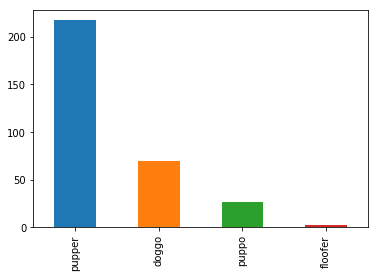

In [133]:
types.plot(kind='bar')
plt.show()

## Third Insight : Top 5 Common Names of dogs 

In [134]:
top_names = df['name'].value_counts().head(5)
top_names

Oliver     10
Charlie    10
Cooper     10
Penny       9
Lucy        9
Name: name, dtype: int64

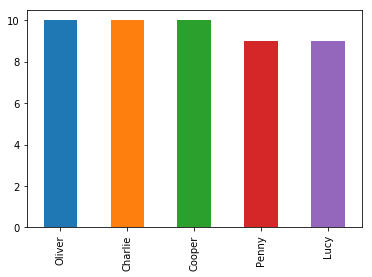

In [135]:
top_names.plot(kind='bar')
plt.show()

# Resources 

 - https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
 - https://twitter.com/dog_rates
 - https://docs.python.org/3/library/json.html#json.loads
 - https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value
 - https://stackoverflow.com/questions/50689823/pandas-drop-rows-vs-filter
 - https://stackoverflow.com/questions/7353968/checking-if-first-letter-of-string-is-in-uppercase